In [1]:
#define model
import functools
import math

def oscillation(t, vec):
    x, y, dx, dy = vec[0], vec[1], vec[2], vec[3]
    nu = 0.012277471
    d_1 = ((x + nu)**2 + y**2)**(3/2) 
    d_2 = ((x - (1 - nu))**2 + y**2)**(3/2)
    ddx = x+2*dy-(1-nu)*(x+nu)/d_1-nu*(x-(1-nu))/d_2
    ddy = y-2*dx-(1-nu)*y/d_1-nu*y/d_2 
    return np.array([dx, dy, ddx, ddy])

In [61]:
#computational method - ЯМРК(4)
import numpy as np

def rungekut4(func, t_0, x_0, t_1):
    h = t_1 - t_0
    k_1 = func(t_0, x_0)
    k_2 = func(t_0 + h/2, x_0 + k_1 * h/2)
    k_3 = func(t_0 + h/2, x_0 + h/2 * k_2)
    k_4 = func(t_0 + h,   x_0 + h   * k_3)
    return x_0 + h/6 * (k_1 + 2*k_2 + 2*k_3 + k_4)

#computational method - ЯМРК(1)

def rungekut1(func, t_0, x_0, t_1):
    h = t_1 - t_0
    k_1 = func(t_0, x_0)
    return x_0 + h * k_1

In [75]:
#compute

from matplotlib import pylab as plt
import math
import time

def compute_tragectory(comp_method_func, model_func, step_size):
    t_0, t_1 = 0, 17.0652165601579625588917206249
    vec_0 = [0.994, 0, 0, -2.00158510637908252240537862224]
    time_step = step_size
    step_num = int((t_1 - t_0)/time_step)
    t = t_0
    vec = vec_0
    x_array, y_array, t_array = [], [], []
    for i in range(step_num):
        vec = comp_method_func(model_func, t, vec, t + time_step)
        t = t + time_step
        x_array.append(vec[0])
        y_array.append(vec[1])
        t_array.append(t)
        
    return x_array, y_array, t_array

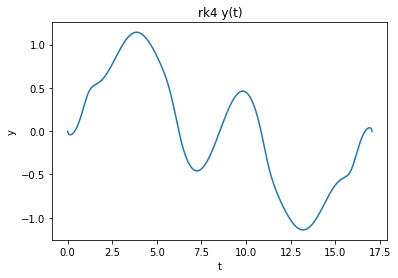

In [78]:
#runge kutta 4 visualization
start_time = time.time()
x_array, y_array, t_array = compute_tragectory(model_func=oscillation, comp_method_func=rungekut4, step_size=0.001)
rungekut4_time = time.time() - start_time

plt.plot(x_array, y_array)
plt.xlabel('x')
plt.ylabel('y')
plt.title('runge kutta 4')
plt.savefig('rungekutt_4')
plt.clf()
plt.plot(t_array, x_array)
plt.xlabel('t')
plt.ylabel('x')
plt.title('rk4 x(t)')
plt.savefig('rk4_x(t)')
plt.clf()
plt.plot(t_array, y_array)
plt.xlabel('t')
plt.ylabel('y')
plt.title('rk4 y(t)')
plt.savefig('rk4_y(t)')


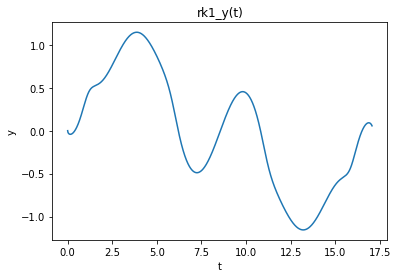

In [84]:
#runge kutta 1 visualization
start_time = time.time()
x_array, y_array, t_array = compute_tragectory(model_func=oscillation, comp_method_func=rungekut1, step_size=0.00001)
rungekut1_time = time.time() - start_time

plt.plot(x_array, y_array)
plt.xlabel('x')
plt.ylabel('y')
plt.title('runge kutta 1')
plt.savefig('rungekutt_1')
plt.clf()
plt.plot(t_array, x_array)
plt.xlabel('t')
plt.ylabel('x')
plt.title('rk1 x(t)')
plt.savefig('rk1_x(t)')
plt.clf()
plt.plot(t_array, y_array)
plt.xlabel('t')
plt.ylabel('y')
plt.title('rk1_y(t)')
plt.savefig('rk1_y(t)')

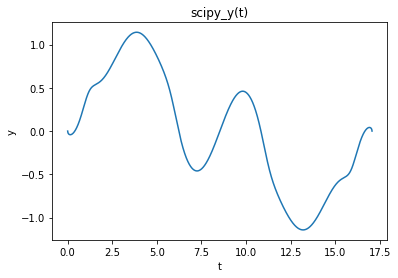

In [85]:
# use of library runge kutta method
import scipy
from scipy.integrate import RK45

start_time = time.time()

t_0, t_1 = 0, 17.0652165601579625588917206249
vec_0 = [0.994, 0, 0, -2.00158510637908252240537862224]    
t = t_0
vec = vec_0
x_array, y_array, t_array = [], [], []
solver = RK45(oscillation, t_0, vec_0, t_1, 0.001)

while solver.status != 'finished':
    solver.step()
    current_interpolant = solver.dense_output()
    vec = np.array(current_interpolant(solver.t))
    x_array.append(vec[0])
    y_array.append(vec[1])
    t_array.append(solver.t)
    
scipy_time = time.time() - start_time
        
plt.plot(x_array, y_array)
plt.xlabel('x')
plt.ylabel('y')
plt.title('scipy method')
plt.savefig('scipy_method')
plt.clf()
plt.plot(t_array, x_array)
plt.xlabel('t')
plt.ylabel('x')
plt.title('scipy x(t)')
plt.savefig('scipy_x(t)')
plt.clf()
plt.plot(t_array, y_array)
plt.xlabel('t')
plt.ylabel('y')
plt.title('scipy_y(t)')
plt.savefig('scipy_y(t)')

In [69]:
print('runge_kutta4_realization takes', rungekut4_time, 'seconds')
print('runge_kutta1_realization takes', rungekut1_time, 'seconds')
print('library_runge_kutta_realization takes', scipy_time, 'seconds')

runge_kutta4_realization takes 0.8518729209899902 seconds
runge_kutta1_realization takes 184.0678186416626 seconds
library_runge_kutta_realization takes 3.814854860305786 seconds
